Dataset shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


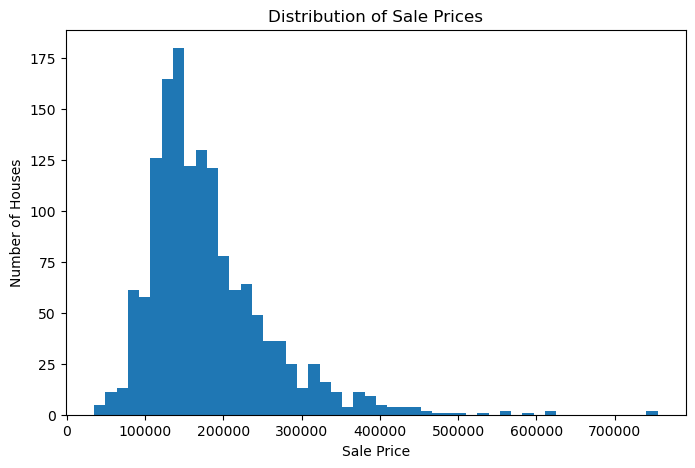

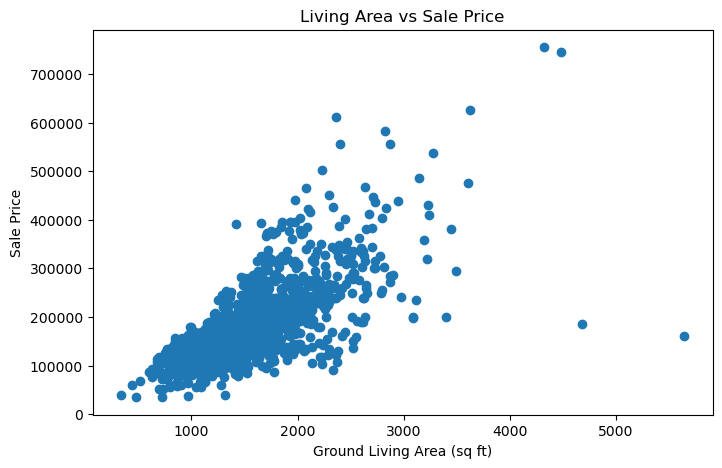

📈 Linear Regression Metrics:
Root Mean Squared Error: 36325.60
R² Score: 0.8280


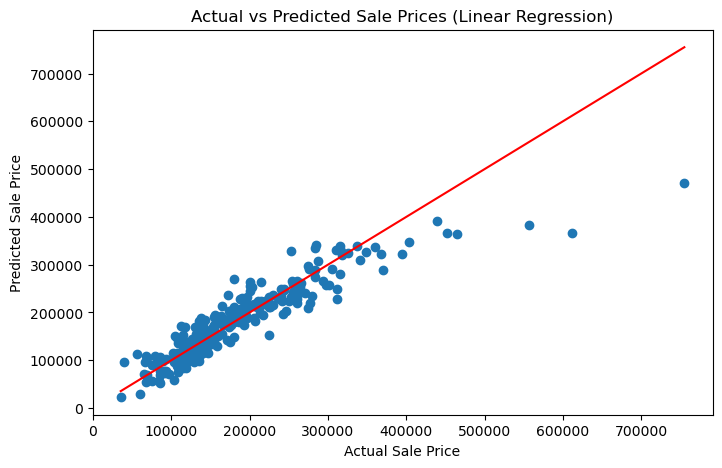


🌳 Random Forest Regressor Metrics (Cross-validated):
Cross-validated RMSE: 31944.22
✅ Basic Random Forest model saved successfully!
Fitting 5 folds for each of 512 candidates, totalling 2560 fits
✅ Best Hyperparameters found:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
🚀 Best Model RMSE: 29354.34
🚀 Best Model R² Score: 0.8877
✅ Best Random Forest model saved successfully!

🔎 Model Comparison:
Intermediate Random Forest ➔ RMSE: 31498.38, R²: 0.8707
Optimized Random Forest   ➔ RMSE: 29354.34, R²: 0.8877


In [9]:
# 🏡 House Price Prediction - Notebook Explicatif Complet

# --------- 1. Import Libraries ---------
# On importe les librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --------- 2. Load and Explore Data ---------
# Charger le fichier CSV contenant les données d'entraînement
df = pd.read_csv('../data/train.csv')

# Afficher la taille du dataset (lignes, colonnes)
print(f"Dataset shape: {df.shape}")

# Afficher les 5 premières lignes du dataset
display(df.head())

# Informations générales sur les colonnes (types, valeurs manquantes)
df.info()

# Statistiques descriptives des variables numériques
display(df.describe())

# --------- 3. Visualize Target Variable ---------
# Visualiser la distribution du prix de vente
plt.figure(figsize=(8,5))
plt.hist(df['SalePrice'], bins=50)
plt.xlabel('Sale Price')
plt.ylabel('Number of Houses')
plt.title('Distribution of Sale Prices')
plt.show()

# Visualiser la relation entre surface habitable et prix
plt.figure(figsize=(8,5))
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.title('Living Area vs Sale Price')
plt.show()

# --------- 4. Feature Engineering ---------
# On sélectionne les colonnes qu'on pense importantes pour prédire le prix
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'Neighborhood']

# Séparer les features (X) et la target (y)
X = df[features]
y = df['SalePrice']

# Encodage One-hot pour la variable catégorielle 'Neighborhood'
X = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True)

# Remplacer les éventuelles valeurs manquantes par 0
X = X.fillna(0)
# Après avoir fait get_dummies
feature_names_after_encoding = X.columns.tolist()

# --------- 5. Train/Test Split ---------
# Diviser les données en 80% pour l'entraînement et 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------- 6. Baseline Model - Linear Regression ---------
# Entraîner un modèle de régression linéaire simple
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Prédire les prix sur le set de test
y_pred_lr = model_lr.predict(X_test)

# Évaluer les performances
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"📈 Linear Regression Metrics:")
print(f"Root Mean Squared Error: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")

# Visualiser la comparaison entre les prix réels et prédits
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices (Linear Regression)')
plt.show()

# --------- 7. Improved Model - Random Forest Regressor ---------
# Modèle plus puissant : Random Forest avec des hyperparamètres de base
model_rf_base = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    min_samples_leaf=2,
    max_features='sqrt'
)
model_rf_base.fit(X_train, y_train)

# Validation croisée pour évaluer la performance moyenne
scores_rf = cross_val_score(model_rf_base, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
mean_rmse_rf = -np.mean(scores_rf)

print(f"\n🌳 Random Forest Regressor Metrics (Cross-validated):")
print(f"Cross-validated RMSE: {mean_rmse_rf:.2f}")

# --------- 8. Save Intermediate Random Forest Model ---------
# Sauvegarder ce modèle intermédiaire
joblib.dump(model_rf_base, '../models/house_price_random_forest_basic.pkl')
print("✅ Basic Random Forest model saved successfully!")

# --------- 9. Hyperparameter Tuning - GridSearchCV ---------
# On crée un nouveau modèle de Random Forest pour le tuning
model_rf = RandomForestRegressor(random_state=42)

# Définir la grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 5],
    'max_features': ['sqrt', 'log2']
}

# Configurer le GridSearchCV
grid_search = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Lancer la recherche d'hyperparamètres
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("✅ Best Hyperparameters found:")
print(grid_search.best_params_)

# --------- 10. Evaluate Best Model ---------
# Utiliser le meilleur modèle trouvé pour prédire
best_model_rf = grid_search.best_estimator_

y_pred_best = best_model_rf.predict(X_test)

# Évaluer les performances du meilleur modèle
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"🚀 Best Model RMSE: {rmse_best:.2f}")
print(f"🚀 Best Model R² Score: {r2_best:.4f}")

# --------- 11. Save Final Optimized Model ---------
# Sauvegarder le modèle optimisé final
joblib.dump({'model': best_model_rf, 'features': feature_names_after_encoding}, '../models/house_price_model.pkl')

print("✅ Best Random Forest model saved successfully!")

# ⚡️ Compare Intermediate vs Best Model

# 1. Prédictions modèle intermédiaire
y_pred_rf = model_rf_base.predict(X_test)

# 2. Prédictions modèle optimisé
y_pred_best = best_model_rf.predict(X_test)

# 3. Calculer métriques pour modèle intermédiaire
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# 4. Calculer métriques pour modèle final
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

# 5. Afficher la comparaison
print("\n🔎 Model Comparison:")

print(f"Intermediate Random Forest ➔ RMSE: {rmse_rf:.2f}, R²: {r2_rf:.4f}")
print(f"Optimized Random Forest   ➔ RMSE: {rmse_best:.2f}, R²: {r2_best:.4f}")
